# Data Science Pipeline Tutorial: College Data

### In this tutorial, we want to run through the data science pipeline from collecting data, cleaning and parsing it, performing exploratory data analysis, hypothesis testing, and machine learning.

This tutorial is designed in python, using a custom dataset adapted from the U.S. Department of Education's College Scorecard. To download the full dataset and documentation, visit https://collegescorecard.ed.gov/data/. We will be focusing on data from the Most Recent Data by Field of Study table in order to learn information about different universities' revenue, tuition costs, racial diversity, and more through the use of the data science pipeline.

## Setup
First, we import the libraries we want to use. We will be using a pandas dataframe to represent and manipulate the data, so we import the pandas library. Matplotlib and seaborn are both useful for plotting data visually, and folium is great for mapping.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
import seaborn as sns

## Loading and Viewing Data

Next, we extract the data from online by using pandas's read_csv() function and the url we use to access the data. If your data is stored locally, read_csv() also works on the path to the file where your data is stored.

In [2]:
url = 'https://raw.githubusercontent.com/aakayan/320_College_Data_Tutorial/main/data.txt'
df = pd.read_csv(url) # Read the data
df.head() # View the data

Unnamed: 0  unit_id                            inst_name        city state  \
0           0   100654             Alabama A & M University      Normal    AL   
1           1   100663  University of Alabama at Birmingham  Birmingham    AL   
2           2   100690                   Amridge University  Montgomery    AL   
3           3   100706  University of Alabama in Huntsville  Huntsville    AL   
4           4   100724             Alabama State University  Montgomery    AL   

          zip                                        accred_inst  \
0       35762  Southern Association of Colleges and Schools C...   
1  35294-0110  Southern Association of Colleges and Schools C...   
2  36117-3553  Southern Association of Colleges and Schools C...   
3       35899  Southern Association of Colleges and Schools C...   
4  36104-0271  Southern Association of Colleges and Schools C...   

                    inst_url  \
0              www.aamu.edu/   
1        https://www.uab.edu   
2  www.amridgeuniversity.edu   
3                www.uah.edu   
4              www.alasu.edu   

                                      net_price_calc  height_cash_monitoring  \
0  www.aamu.edu/admissions-aid/tuition-fees/net-p...                       0   
1   https://uab.studentaidcalculator.com/survey.aspx                       0   
2                   www2.amridgeuniversity.edu:9091/                       0   
3                                    finaid.uah.edu/                       0   
4  www.alasu.edu/cost-aid/tuition-costs/net-price...                       0   

   ...  blackNH_ugds  title4_stud_pub  title4_stud_priv  atnd_cost_acad_yr  \
0  ...           NaN            592.0               NaN            22489.0   
1  ...           NaN           1229.0               NaN            24347.0   
2  ...           NaN              NaN               5.0            17680.0   
3  ...           NaN            585.0               NaN            23441.0   
4  ...           NaN            523.0               NaN            21476.0   

   in_st_tuition  out_st_tuition  net_tuition_rev_per_fts  \
0         9744.0         18354.0                   7413.0   
1         8568.0         19704.0                  13177.0   
2         6900.0          6900.0                  14273.0   
3        10714.0         22362.0                   8677.0   
4        11068.0         19396.0                  10160.0   

   inst_expend_per_fts  avg_fac_salary  full_time_faculty_pct  
0               5384.0          7101.0                 0.7411  
1              16454.0         10717.0                 0.7766  
2               4206.0          4292.0                 1.0000  
3               9242.0          9442.0                 0.6544  
4               8527.0          7754.0                 0.5826  

[5 rows x 67 columns]

This data is now loaded into our dataframe, df. A pandas dataframe is a 2-dimenstional structure that stores data, like a spreadsheet. With dataframes, pandas gives us many ways to interact with our data. This dataframe has each row representing a university, and each column representing one attribute of the university, such as its name, latitude and logitude, website url, and more.

However, it turns out we can't view all of the data. Let's change up some settings in pandas to view all the columns.

In [3]:
pd.options.display.max_columns = None #removes the limit on the maximum columns you can view
df.head() #View the data again

Unnamed: 0  unit_id                            inst_name        city state  \
0           0   100654             Alabama A & M University      Normal    AL   
1           1   100663  University of Alabama at Birmingham  Birmingham    AL   
2           2   100690                   Amridge University  Montgomery    AL   
3           3   100706  University of Alabama in Huntsville  Huntsville    AL   
4           4   100724             Alabama State University  Montgomery    AL   

          zip                                        accred_inst  \
0       35762  Southern Association of Colleges and Schools C...   
1  35294-0110  Southern Association of Colleges and Schools C...   
2  36117-3553  Southern Association of Colleges and Schools C...   
3       35899  Southern Association of Colleges and Schools C...   
4  36104-0271  Southern Association of Colleges and Schools C...   

                    inst_url  \
0              www.aamu.edu/   
1        https://www.uab.edu   
2  www.amridgeuniversity.edu   
3                www.uah.edu   
4              www.alasu.edu   

                                      net_price_calc  height_cash_monitoring  \
0  www.aamu.edu/admissions-aid/tuition-fees/net-p...                       0   
1   https://uab.studentaidcalculator.com/survey.aspx                       0   
2                   www2.amridgeuniversity.edu:9091/                       0   
3                                    finaid.uah.edu/                       0   
4  www.alasu.edu/cost-aid/tuition-costs/net-price...                       0   

    latitude  longitude  hbcu  pbi  ANNHI  tribal  AANAPII  hisp_serving_inst  \
0  34.783368 -86.568502   1.0  0.0    0.0     0.0      0.0                0.0   
1  33.505697 -86.799345   0.0  0.0    0.0     0.0      0.0                0.0   
2  32.362609 -86.174010   0.0  1.0    0.0     0.0      0.0                0.0   
3  34.724557 -86.640449   0.0  0.0    0.0     0.0      0.0                0.0   
4  32.364317 -86.295677   1.0  0.0    0.0     0.0      0.0                0.0   

   NANTI  men_only  women_only  adm_rate  adm_rate_all  sat_vr_25pct  \
0    0.0       0.0         0.0    0.8986        0.8986         430.0   
1    0.0       0.0         0.0    0.9211        0.9211         490.0   
2    0.0       0.0         0.0       NaN           NaN           NaN   
3    0.0       0.0         0.0    0.8087        0.8087         560.0   
4    0.0       0.0         0.0    0.9774        0.9774         440.0   

   sat_vr_75pct  sat_mt_25pct  sat_mt_75pct  sat_wr_25pct  sat_wr_75pct  \
0         520.0         420.0         510.0         370.0         457.0   
1         620.0         490.0         620.0           NaN           NaN   
2           NaN           NaN           NaN           NaN           NaN   
3         700.0         450.0         680.0           NaN           NaN   
4         520.0         420.0         510.0           NaN           NaN   

   sat_vr_mid  sat_mt_mid  sat_wr_mid  act_cm_25pct  act_cm_75pct  \
0       475.0       465.0       414.0          16.0          19.0   
1       555.0       555.0         NaN          21.0          29.0   
2         NaN         NaN         NaN           NaN           NaN   
3       630.0       565.0         NaN          25.0          31.0   
4       480.0       465.0         NaN          16.0          20.0   

   act_en_25pct  act_en_75pct  act_mt_25pct  act_mt_75pct  act_wr_25pct  \
0          14.0          20.0          15.0          18.0           NaN   
1          22.0          31.0          19.0          26.0           NaN   
2           NaN           NaN           NaN           NaN           NaN   
3          25.0          34.0          24.0          30.0           NaN   
4          14.0          20.0          15.0          18.0           NaN   

   act_wr_75pct  act_cm_mid  act_en_mid  act_mt_mid  act_wr_mid  sat_avg  \
0           NaN        18.0        17.0        17.0         NaN    957.0   
1           NaN        25.0        27.0     

## Missing Data
In this data, you can see that some values in some columns are listed as "NaN". This means that there is missing data for this column from the selected university. There are many ways to deal with missing data, such as trying to fill in reasonable values or simply removing the associated row or column. In order to best determine what to do about missing data, let us first evaluate which columns have the most missing data.

In [4]:
missing_count_df = pd.DataFrame(df.isna().sum(),columns=["Missing Values"]) #creating a new dataframe by summing how many values in each column are missing
missing_count_df[(missing_count_df.T != 0).any()] #switching around rows and columns for easier viewing
missing_count_df.sort_values(by=["Missing Values"], ascending=False).head(10) #viewing the top 10 columns with the most missing data

Missing Values
blackNH_ugds            3431
whiteNH_ugds            3431
act_wr_75pct            3112
act_wr_mid              3112
act_wr_25pct            3112
sat_wr_75pct            2707
sat_wr_25pct            2707
sat_wr_mid              2707
act_en_25pct            2243
act_en_75pct            2243

The columns missing the most data are the columns for number of Black, non-hispanic undergraduates, the number of White non-hispanic undergraduates, as well as statistics about mean SAT and ACT section scores. 

This could be for various reasons. For example, the dataframe already has columns for Black students, White students, and Hispanic students, so likely they did not also count the overlapping Black and Hispanic or White and Hispanic students. Instead, they kept them separated. As a result, they also did not categorize the Black Non-Hispanic and White Non-Hispanic students. In this case, we do not know how to estimate how many of the Black and White students are not Hispanic, so we will opt to simply drop these columns.

The SAT and ACT sections may be missing data due to factors like test-optionality when students are applying, a lack of separating out the various scores once they are collected, or other reasons. We will opt to remove these columns too.

In [5]:
df = df.drop(columns=['blackNH_ugds','whiteNH_ugds', 'act_wr_75pct', 'act_wr_mid', 'act_wr_25pct', 'sat_wr_25pct', 'sat_wr_mid', 'sat_wr_75pct', 'act_en_25pct', 'act_en_75pct', 'act_mt_mid', 'act_en_mid', 'act_mt_75pct', 'act_mt_25pct', 'sat_vr_75pct', 'sat_vr_25pct', 'sat_vr_mid', 'sat_mt_mid', 'sat_mt_25pct', 'sat_mt_75pct', 'act_cm_75pct', 'act_cm_25pct', 'act_cm_mid', 'sat_avg', 'sat_avg_all'])
display(df)

Unnamed: 0  unit_id                                          inst_name  \
0              0   100654                           Alabama A & M University   
1              1   100663                University of Alabama at Birmingham   
2              2   100690                                 Amridge University   
3              3   100706                University of Alabama in Huntsville   
4              4   100724                           Alabama State University   
...          ...      ...                                                ...   
3426        6271   491710                       Yeshiva Gedolah of Cliffwood   
3427        6276   491765                              Yeshivas Emek Hatorah   
3428        6281   491817                                Seminary Bnos Chaim   
3429        6319   492801  Drury University-College of Continuing Profess...   
3430        6322   492962  Indiana Institute of Technology-College of Pro...   

             city state         zip  \
0          Normal    AL       35762   
1      Birmingham    AL  35294-0110   
2      Montgomery    AL  36117-3553   
3      Huntsville    AL       35899   
4      Montgomery    AL  36104-0271   
...           ...   ...         ...   
3426      Keyport    NJ  07735-5105   
3427       Howell    NJ  07731-2444   
3428     Lakewood    NJ  08701-2336   
3429  Springfield    MO       65802   
3430   Fort Wayne    IN       46803   

                                            accred_inst  \
0     Southern Association of Colleges and Schools C...   
1     Southern Association of Colleges and Schools C...   
2     Southern Association of Colleges and Schools C...   
3     Southern Association of Colleges and Schools C...   
4     Southern Association of Colleges and Schools C...   
...                                                 ...   
3426  Association of Advanced Rabbinical and Talmudi...   
3427      Association of Institutions of Jewish Studies   
3428      Association of Institutions of Jewish Studies   
3429                         Higher Learning Commission   
3430                         Higher Learning Commission   

                                 inst_url  \
0                           www.aamu.edu/   
1                     https://www.uab.edu   
2               www.amridgeuniversity.edu   
3                             www.uah.edu   
4                           www.alasu.edu   
...                                   ...   
3426  https://yeshivagedolahcliffwood.com   
3427              yeshivasemekhatorah.com   
3428            www.seminarybnoschaim.com   
3429                  www.drury.edu/ccps/   
3430                 cps.indianatech.edu/   

                                         net_price_calc  \
0     www.aamu.edu/admissions-aid/tuition-fees/net-p...   
1      https://uab.studentaidcalculator.com/survey.aspx   
2                      www2.amridgeuniversity.edu:9091/   
3                                       finaid.uah.edu/   
4     www.alasu.edu/cost-aid/tuition-costs/net-price...   
...                                                 ...   
3426  https://yeshivagedolahcliffwood.com/wp-content...   
3427                     yeshivasemekhatorah.com/links/   
3428  seminarybnoschaim.com/wp-content/uploads/Net%2...   
3429  tcc.ruffalonl.com/Drury%20University/Freshman-...   
3430                         cps.indianatech.edu/costs/   

      height_cash_monitoring   latitude  longitude  hbcu  pbi  ANNHI  tribal  \
0                          0  34.783368 -86.568502   1.0  0.0    0.0     0.0   
1                          0  33.505697 -86.799345   0.0  0.0    0.0     0.0   
2                          0  32.362609 -86.174010   0.0  1.0    0.0     0.0   
3                          0  34.724557 -86.640449   0.0  0.0    0.0     0.0   
4                          0  32.364317 -86.295677   1.0  0.0    0.0     0.0   
...                      ...        ...        ...   ...  ...    ...     ...   
3426                       0  40.442213 -74.224235   0.0 

## Exploratory Data Analysis

Since we want to explore the relationships between different attributes of these universities, we have to first do some additional analysis. One thing we can do is create a correlation matrix that shows whether two variables are closely related, not seemingly related, or even negatively correlated. The darker colors show a strong correlation, and the lighter colors show a weaker correlation, or even a negative correlation.

[Text(0, 0.5, 'Unnamed: 0'),
 Text(0, 1.5, 'unit_id'),
 Text(0, 2.5, 'height_cash_monitoring'),
 Text(0, 3.5, 'latitude'),
 Text(0, 4.5, 'longitude'),
 Text(0, 5.5, 'hbcu'),
 Text(0, 6.5, 'pbi'),
 Text(0, 7.5, 'ANNHI'),
 Text(0, 8.5, 'tribal'),
 Text(0, 9.5, 'AANAPII'),
 Text(0, 10.5, 'hisp_serving_inst'),
 Text(0, 11.5, 'NANTI'),
 Text(0, 12.5, 'men_only'),
 Text(0, 13.5, 'women_only'),
 Text(0, 14.5, 'adm_rate'),
 Text(0, 15.5, 'adm_rate_all'),
 Text(0, 16.5, 'UGDS'),
 Text(0, 17.5, 'white_ugds'),
 Text(0, 18.5, 'black_ugds'),
 Text(0, 19.5, 'hisp_ugds'),
 Text(0, 20.5, 'asian_ugds'),
 Text(0, 21.5, 'AIAN_ugds'),
 Text(0, 22.5, 'NHPI_ugds'),
 Text(0, 23.5, 'birac_ugds'),
 Text(0, 24.5, 'non_res_alien_ugds'),
 Text(0, 25.5, 'unkn_ugds'),
 Text(0, 26.5, 'title4_stud_pub'),
 Text(0, 27.5, 'title4_stud_priv'),
 Text(0, 28.5, 'atnd_cost_acad_yr'),
 Text(0, 29.5, 'in_st_tuition'),
 Text(0, 30.5, 'out_st_tuition'),
 Text(0, 31.5, 'net_tuition_rev_per_fts'),
 Text(0, 32.5, 'inst_expend_per_f

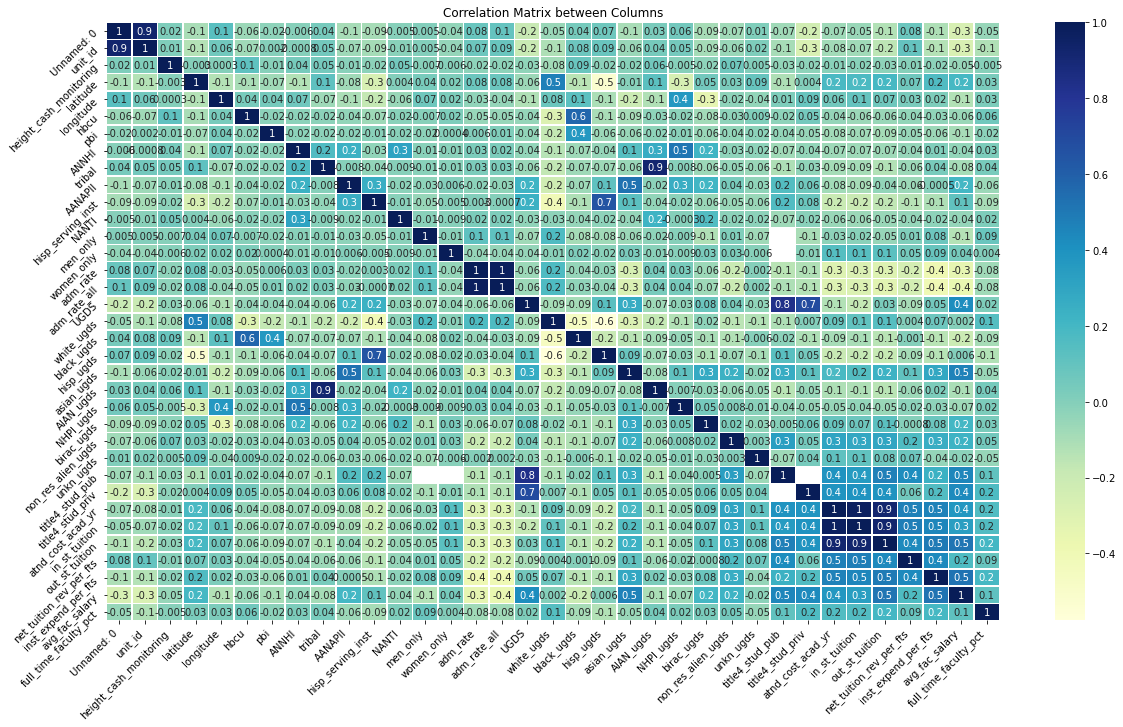

In [16]:
#Correlation Matrix
plt.subplots(figsize = (20,11))
g = sns.heatmap(df.corr(), annot = True, cmap = "YlGnBu", fmt = '.1g', linewidths=.5,)

g.set_title("Correlation Matrix between Columns")
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_yticklabels(g.get_yticklabels(), rotation=45, horizontalalignment='right')

Some unsurprising obeservations we can make from this correlation matrix is that tuition rates are somewhat correlated with the revenue per student, and they are somewhat negatively correlated with admission rate.

Some more surprising observations include the various correlations between latitude and longitude and the racial demographics of colleges. This may be interesting to explore on a map.

There are 3400 rows in our dataframe currently, which means there are a lot of Universities to look at. Here we can see them all mapped using the folium library, with a dot marker for each university.

In [79]:
m = folium.Map(location=[30, -95], zoom_start=3.5) #create a map in Folium


for r in df.iterrows(): #perform the following for each row in the dataframe--
    if((pd.isna(r[1].latitude) == False) and (pd.isna(r[1].longitude) == False)): #if lat and long are not NaN
        m.add_child(folium.CircleMarker(location=[r[1].latitude, r[1].longitude], fill='true', radius = 5,
        popup= 'Hi',fill_color='blue', color = 'clear',fill_opacity=1)) #create a dot marker and add to the map

In [80]:
m #display the map with the new markers

In order to further explore geographical trends in racial demographics, we can plot the different percentage of students of each rate on a scatterplot by location. Grouping racial demographic by latitude and longitude is less meaningful in the US, where multiple states with a variety of socioeconomic situations exist at similar latitudes or longitudes. Instead, we can look at the demographic breakdown of universities by state.

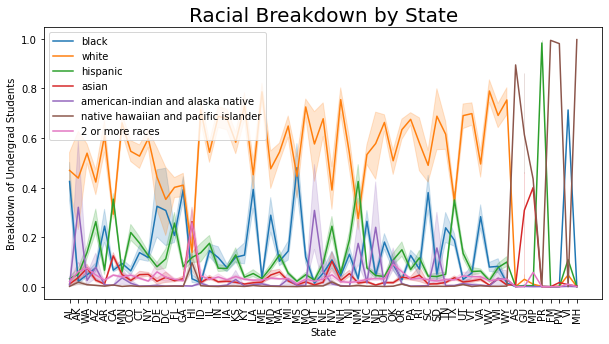

In [101]:
#get each race column as an an array
black = df.black_ugds
white = df.white_ugds
hispanic = df.hisp_ugds
asian = df.asian_ugds
aian = df.AIAN_ugds
nhpi = df.NHPI_ugds
biracial = df.birac_ugds

#create a matplotlib figure, assign title and labels
plt.figure(figsize=(10,5))
plt.title('Racial Breakdown by State', fontsize=20)
plt.xlabel("State")
plt.ylabel("Breakdown of Undergrad Students")
plt.xticks(rotation=90)

#add each array as a scatterplot
sns.scatterplot(x=df.state, y=black)
sns.scatterplot(x=df.state, y=white)
sns.scatterplot(x=df.state, y=hispanic)
sns.scatterplot(x=df.state, y=asian)
sns.scatterplot(x=df.state, y=aian)
sns.scatterplot(x=df.state, y=nhpi)
sns.scatterplot(x=df.state, y=biracial)
plt.legend(["black", 'white', 'hispanic', 'asian', 'american-indian and alaska native', 'native hawaiian and pacific islander', '2 or more races'])

This line plot is very difficult to interpret, so we will take the average within each state. This leaves us fewer data points and a basis for comparison when looking at trends in universities in different states.

In [99]:
df2 = df.filter(['black_ugds', 'white_ugds', 'hisp_ugds', 'asian_ugds', 'AIAN_ugds', 'NHPI_ugds', 'birac_ugds', 'state'], axis=1)
df2 = df2.round({'latitude':1}).groupby('state').mean()

Now, if we make a similar plot to the one above, it should be clearer per state. This time, we opted to use a line plot to emphasize p

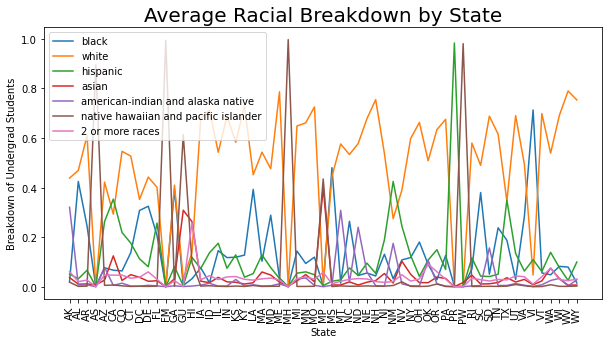

In [100]:
plt.figure(figsize=(10,5))
plt.title('Average Racial Breakdown by State', fontsize=20)
plt.xlabel("State")
plt.ylabel("Breakdown of Undergrad Students")
plt.xticks(rotation=90)

#add each array as a scatterplot
sns.lineplot(x=df2.index, y=df2.black_ugds)
sns.lineplot(x=df2.index, y=df2.white_ugds)
sns.lineplot(x=df2.index, y=df2.hisp_ugds)
sns.lineplot(x=df2.index, y=df2.asian_ugds)
sns.lineplot(x=df2.index, y=df2.AIAN_ugds)
sns.lineplot(x=df2.index, y=df2.NHPI_ugds)
sns.lineplot(x=df2.index, y=df2.birac_ugds)
plt.legend(["black", 'white', 'hispanic', 'asian', 'american-indian and alaska native', 'native hawaiian and pacific islander', '2 or more races'])